#### Task 1: Identify the main groups of countries and their global happiness characteristics using Clustering techniques
                       
#### 1.	Importing the libraries and DataFrame:
I have imported all the libraries which we need to apply for the below algorithms. I used pandas library to import the dataset into the jupyter notebook. Now the shape of the data frame is (149,20)  means 149 rows and 20 columns.


In [1]:
import warnings

import os

import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from numpy import percentile

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('Happiness-Data.csv')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace(':','')
df.columns = df.columns.str.replace('+','')


df.head()

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by_Log_GDP_per_capita,Explained_by_Social_support,Explained_by_Healthy_life_expectancy,Explained_by_Freedom_to_make_life_choices,Explained_by_Generosity,Explained_by_Perceptions_of_corruption,Dystopia__residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
def shape(x):
    print('Shape of the dataframe is', x.shape)
shape(df)

Shape of the dataframe is (149, 20)


#### 2.Identification and treatment of any Missing Values:
    
I found that the data frame does not have missing and duplicate values.



In [4]:
def null_value(x):
    print(x.isnull().sum())
    print("*"*40)
    print('Duplicate_values: ',x.duplicated().sum())

    
null_value(df)

Country_name                                 0
Regional_indicator                           0
Ladder_score                                 0
Standard_error_of_ladder_score               0
upperwhisker                                 0
lowerwhisker                                 0
Logged_GDP_per_capita                        0
Social_support                               0
Healthy_life_expectancy                      0
Freedom_to_make_life_choices                 0
Generosity                                   0
Perceptions_of_corruption                    0
Ladder_score_in_Dystopia                     0
Explained_by_Log_GDP_per_capita              0
Explained_by_Social_support                  0
Explained_by_Healthy_life_expectancy         0
Explained_by_Freedom_to_make_life_choices    0
Explained_by_Generosity                      0
Explained_by_Perceptions_of_corruption       0
Dystopia__residual                           0
dtype: int64
****************************************
Duplic

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country_name                               149 non-null    object 
 1   Regional_indicator                         149 non-null    object 
 2   Ladder_score                               149 non-null    float64
 3   Standard_error_of_ladder_score             149 non-null    float64
 4   upperwhisker                               149 non-null    float64
 5   lowerwhisker                               149 non-null    float64
 6   Logged_GDP_per_capita                      149 non-null    float64
 7   Social_support                             149 non-null    float64
 8   Healthy_life_expectancy                    149 non-null    float64
 9   Freedom_to_make_life_choices               149 non-null    float64
 10  Generosity                

#### 3. Finding the corelation between all variables: 
Heatmaps represent data in a two-dimensional format, with colours representing values and a two-dimensional plot providing an immediate visual representation of correlations between variables. To find the correlation between all the variables, we can use scatter plot as well as heat plot. I used a heatmap.


<AxesSubplot:>

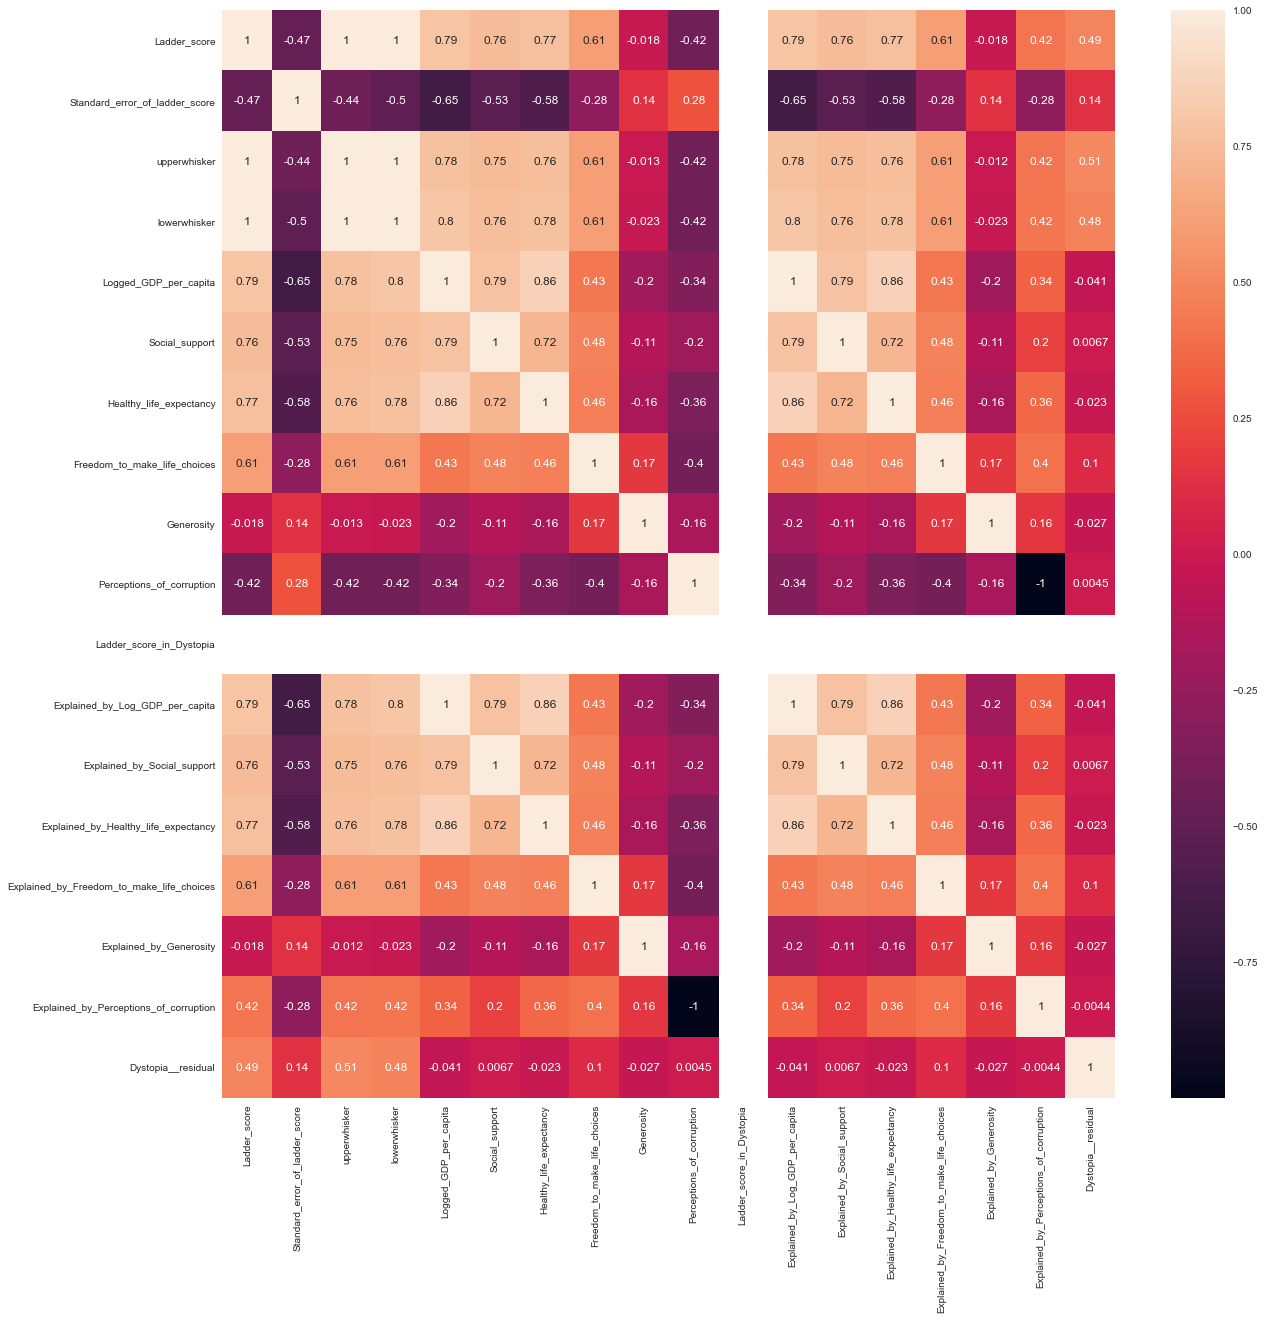

In [6]:
plt.figure(figsize =(20,20))
sns.heatmap(df.corr(), annot= True)

The graph clearly shows the correlation between each variable. The value near 1 and -1 have a strong correlation. Hence, we can eliminate the columns which have a strong correlation. 
Furthermore, eliminating the columns, ['upperwhisker','lowerwhisker','Explained_by_Log_GDP_per_capita','Explained_by_Social_support','Explained_by_Healthy_life_expectancy','Explained_by_Freedom_to_make_life_choices','Explained_by_Generosity'].


In [7]:
df = df.drop(['upperwhisker','lowerwhisker','Explained_by_Log_GDP_per_capita','Explained_by_Social_support','Explained_by_Healthy_life_expectancy','Explained_by_Freedom_to_make_life_choices','Explained_by_Generosity','Ladder_score_in_Dystopia','Explained_by_Perceptions_of_corruption'], axis=1)
df.head()

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia__residual
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179,2.868
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.4,0.919,0.025,0.292,2.839
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.0,0.955,0.160,0.673,2.967
4,Netherlands,Western Europe,7.464,0.027,10.932,0.942,72.4,0.913,0.175,0.338,2.798


Post eliminating, we can see the variables healthy_life_expectancy and Logged_GDP_per_capita correlate about 86%. This can be eliminated if it is still greater than 90%.

<AxesSubplot:>

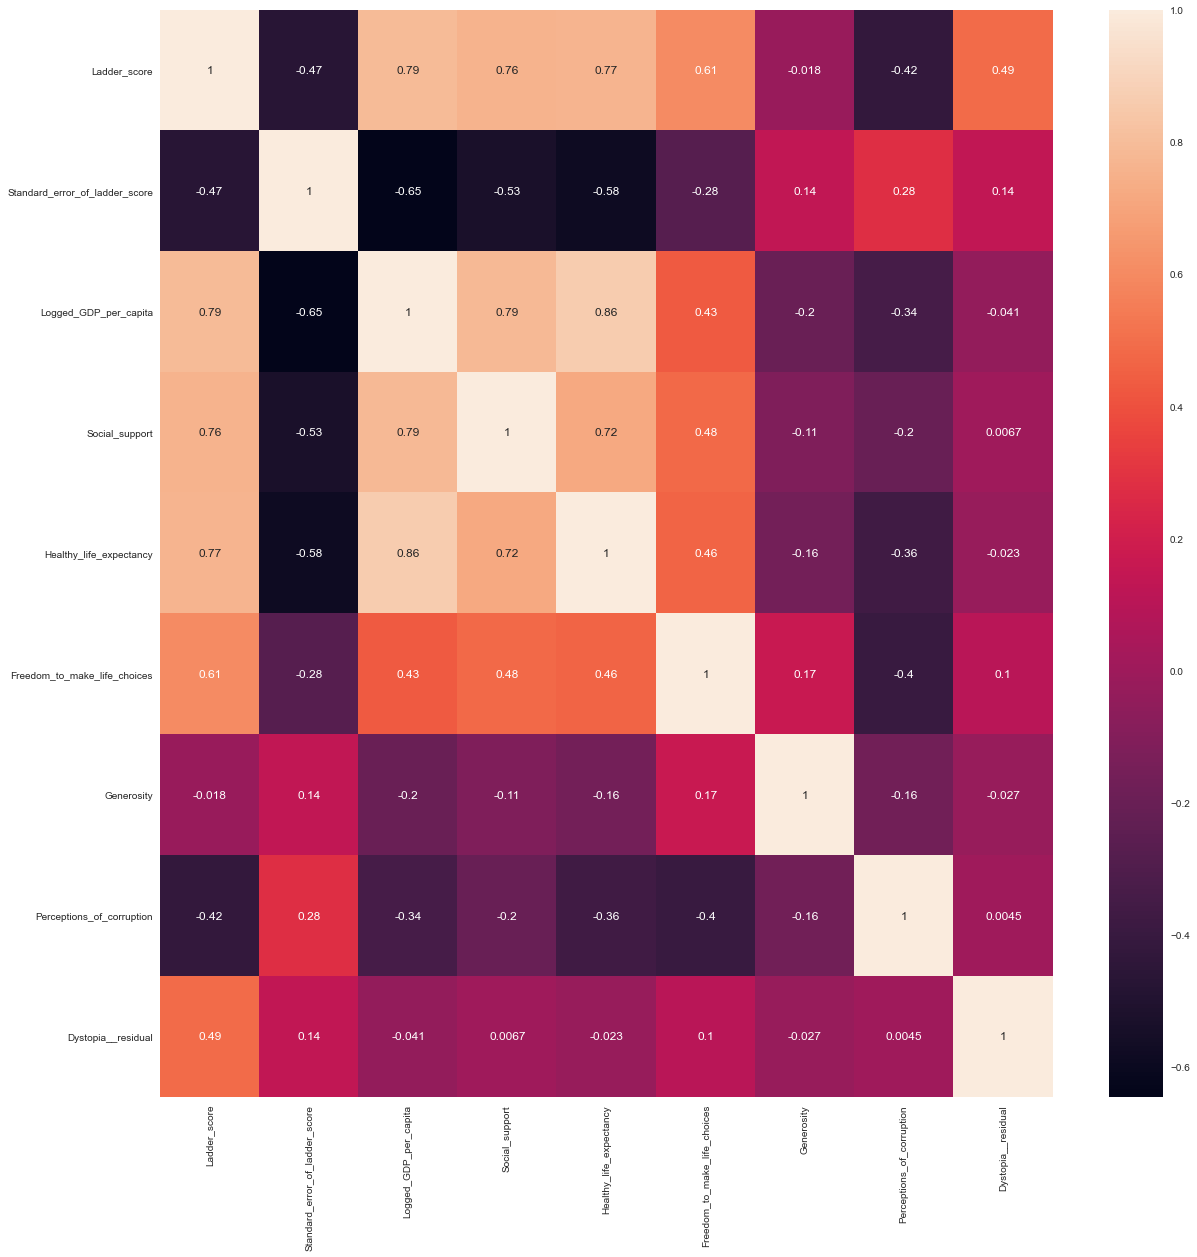

In [8]:
plt.figure(figsize =(20,20))
sns.heatmap(df.corr(), annot= True)

#### 4. Identification and treatment of any Outliers

Statistical outliers are observations that differ significantly from other data points in a dataset. This can be caused by measurement errors and misinterpretation of filling in data points. A scatterplot and boxplot are two types of graphical methods you can use to detect outliers. I prefer a boxplot.


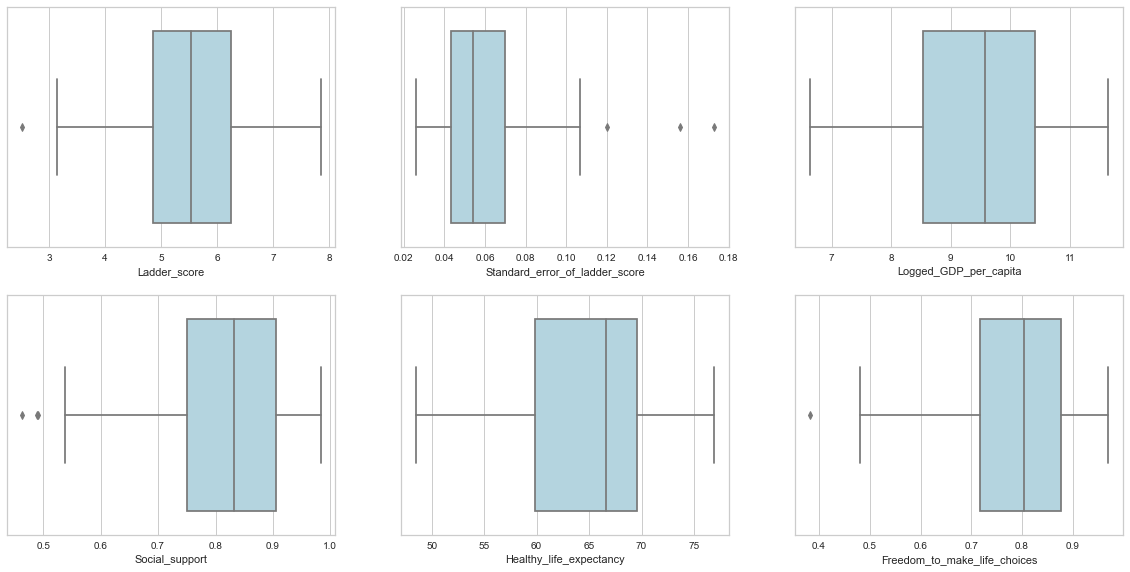

In [9]:


def box_plot(df):
    plt.figure(figsize= (20,15))
    plt.subplot(3,3,1)
    sns.boxplot(x= df.Ladder_score, color='lightblue')

    plt.subplot(3,3,2)
    sns.boxplot(x= df.Standard_error_of_ladder_score, color='lightblue')


    plt.subplot(3,3,3)
    sns.boxplot(x= df.Logged_GDP_per_capita, color='lightblue')

    plt.subplot(3,3,4)
    sns.boxplot(x= df.Social_support, color='lightblue')
    
    plt.subplot(3,3,5)
    sns.boxplot(x= df.Healthy_life_expectancy, color='lightblue')
    
    plt.subplot(3,3,6)
    sns.boxplot(x= df.Freedom_to_make_life_choices, color='lightblue')
    
    plt.show()
    
    
box_plot(df)





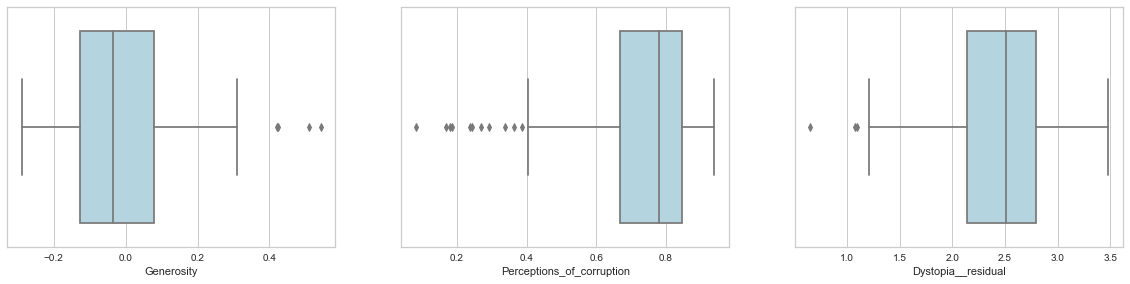

In [10]:
def box_plot(df):
    
    plt.figure(figsize= (20,15))
    
    
    plt.subplot(3,3,1)
    sns.boxplot(x= df.Generosity, color='lightblue')
    
    plt.subplot(3,3,2)
    sns.boxplot(x= df.Perceptions_of_corruption, color='lightblue')
    
    
    plt.subplot(3,3,3)
    sns.boxplot(x= df.Dystopia__residual, color='lightblue')
    
    
    plt.show()
    
box_plot(df)

In [11]:
df = df[df['Ladder_score']>3]
df = df[df['Standard_error_of_ladder_score']<0.12]
df = df[df['Freedom_to_make_life_choices']>0.5]
df = df[df['Generosity']<0.4]
df = df[df['Dystopia__residual']>1.2]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 147
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country_name                    138 non-null    object 
 1   Regional_indicator              138 non-null    object 
 2   Ladder_score                    138 non-null    float64
 3   Standard_error_of_ladder_score  138 non-null    float64
 4   Logged_GDP_per_capita           138 non-null    float64
 5   Social_support                  138 non-null    float64
 6   Healthy_life_expectancy         138 non-null    float64
 7   Freedom_to_make_life_choices    138 non-null    float64
 8   Generosity                      138 non-null    float64
 9   Perceptions_of_corruption       138 non-null    float64
 10  Dystopia__residual              138 non-null    float64
dtypes: float64(9), object(2)
memory usage: 12.9+ KB


I found most of the columns have outliers, and I have eliminated them except the variable Perceptions_of_corruption since the two columns have more extreme values. If we remove the outliers, the data would be biased. Subsequently, eliminating the outliers and the shape of the data has become 138 rows and columns are 10 from 149 rows and 10 columns.

#### 5. Data Normalisation

Normalization is a procedure frequently applied as a feature of information groundwork for Machine learning. The objective of normalization is to change the upsides of numeric segments in the dataset to utilize a typical scale, without contorting contrasts in the scopes of qualities or losing data.


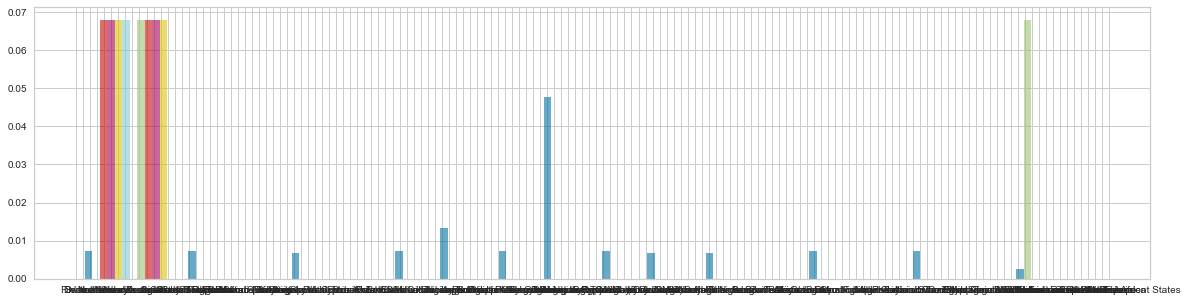

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize= (20,5))
plt.hist(df, density=True, alpha=0.6)
  
plt.show()

According to the standard, I should use normalization if I realize that the conveyance of the information doesn't follow a Gaussian distribution. I used the library matplotlib to plot the information. In this way, we can find whether the entire informational index is distributed normally. By seeing the chart, we get to realize that we can normalise the data since the data is not normally distributed.
	To give equivalent significance to all elements, we really want to normalise the persistent elements. We utilized sklearn preprocessing to normalize the data. Below is the information which is introduced before the Normalization.


In [14]:
data = df.iloc[:,2:]
data.head()

,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia__residual
0,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
1,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179,2.868
2,7.571,0.036,11.117,0.942,74.4,0.919,0.025,0.292,2.839
3,7.554,0.059,10.878,0.983,73.0,0.955,0.160,0.673,2.967
4,7.464,0.027,10.932,0.942,72.4,0.913,0.175,0.338,2.798


In [15]:
from sklearn import preprocessing


normalized_data = preprocessing.Normalizer().fit_transform(data)
normalized_data = pd.DataFrame(normalized_data)
normalized_data

,0,1,2,3,4,5,6,7,8
0,0.106974,0.000437,0.146983,0.013014,0.982160,0.012945,-0.001337,0.002537,0.044375
1,0.103002,0.000473,0.147784,0.012895,0.982706,0.012787,0.000406,0.002420,0.038768
2,0.100051,0.000476,0.146912,0.012449,0.983200,0.012145,0.000330,0.003859,0.037518
3,0.101714,0.000794,0.146472,0.013236,0.982943,0.012859,0.002154,0.009062,0.039951
4,0.101322,0.000367,0.148400,0.012787,0.982815,0.012394,0.002376,0.004588,0.037982
...,...,...,...,...,...,...,...,...,...
133,0.069870,0.001980,0.122805,0.009069,0.988361,0.011586,-0.000444,0.011235,0.053231
134,0.063308,0.001211,0.131151,0.014399,0.988601,0.010419,-0.002544,0.013845,0.030737
135,0.061752,0.001210,0.134242,0.011965,0.988559,0.014198,0.003119,0.009835,0.021527
136,0.061509,0.001572,0.118882,0.009175,0.990083,0.013327,0.000649,0.012455,0.037418


As seen in the below fig. the normalization values have changed.

#### 6. Dimensionality Reduction Using PCA

Dimensionality reduction involves reducing the number of input variables or columns in modeling data. PCA is a technique from linear algebra that can be used to automatically perform dimensionality reduction.

The initial data had 19 variables. We dropped the correlated variables and the total variable was 10. In this part, the code projects the first information which is 10 dimensional into 3 dimensions. I should take note that after dimensionality reduction, there generally isn't a specific significance allocated to every principal component. The new components are just the 3 main dimensions of variation.

Presently 3 dimensions appear to be entirely sensible. With 3 variables we can clarify more than 95% of the variety in the first information which is displayed in the underneath plot!


([<matplotlib.axis.XTick at 0x7fc7e38e7e80>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

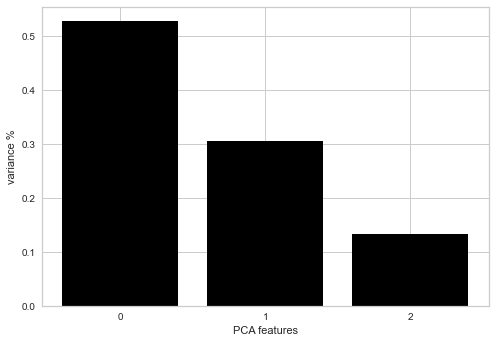

In [16]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(normalized_data)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)


# Eigen Values

In [17]:
pca.explained_variance_ratio_


array([0.52702324, 0.30538928, 0.13355203])

# The percentage of variation explained by each eigen Vector

In [18]:
print(pca.components_)

[[ 7.56207208e-01 -6.68666837e-04  4.19858675e-01  3.29260917e-02
  -1.44784292e-01  4.08215795e-02  1.32193226e-02 -3.87683040e-02
   4.75897207e-01]
 [-1.21661869e-02  2.29677904e-02 -7.16505788e-01 -4.41136233e-02
   7.58279971e-02  2.83084868e-02  3.06512777e-02  1.02289897e-01
   6.82674102e-01]
 [-5.84930357e-01  3.21824843e-02  5.19738128e-01 -1.57810722e-03
  -5.69152255e-02 -6.42000664e-03 -6.40410810e-02  3.77240182e-01
   4.86824998e-01]]


#### 7. Finding the ideal number of clusters using Elbow method :

In cluster analysis, the elbow method is a heuristic utilized in deciding the number of clusters in an informational collection. The technique comprises of plotting the clarified variety as an element of the number of groups and picking the elbow of the curve as the number of clusters to utilize.


In [19]:
Sum_of_squared_distances = []
K = range(1,15)
for clusters in K:
    km = KMeans(n_clusters=clusters)
    km = km.fit(principalComponents)
    Sum_of_squared_distances.append(km.inertia_)


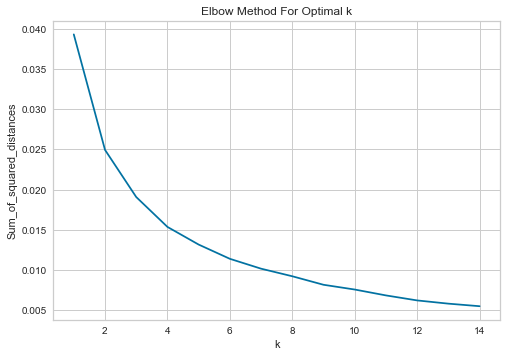

In [20]:
plt.plot(K, Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For every K value, I initialized k-means and utilize the inertia attribute to distinguish the sum of squared distances of samples to the closest group community. As K increases, the sum of squared distance tends to zero. Imagine we set K to its greatest worth n (where n is a number of samples) each example will shape its own bunch importance amount of squared distances rises to nothing. Above is a plot of the sum of squared distances for K in the range indicated previously. Assuming the plot resembles an arm, the elbow on the arm is ideal K.


The above chart says that the cluster can be 2 since the curve starts bends at 2. In any case, the silhouette_score is utilized to find the ideal clusters. Higher the value of silhoutte score, better the cluster. To find the silhouette_score we utilized the library silhouette_score from sklearn.metrics





#### Finding the ideal number of clusters using Silhouette method :

Silhouette  score refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified. 
	
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

Furthermore, we used the code,(silhouette_score(data, foresee, random_state= 10)) to track down the score.


In [21]:

from sklearn.metrics import silhouette_score


n_clusters = [2,3,4,5,6]


for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(data)
    score = silhouette_score(data, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.621182661392437)
For n_clusters = 3, silhouette score is 0.5526260806237652)
For n_clusters = 4, silhouette score is 0.5289564205836438)
For n_clusters = 5, silhouette score is 0.4827379082632182)
For n_clusters = 6, silhouette score is 0.43166934419543673)


The above score for cluster 2 is 0.62 which is the most elevated one. Thus, the ideal value of cluster is 2. 
Moreover, we are writing the algorithm with 2 clusters. Post applying the algorithm with 2 clusters we found that the 2 clusters created are 0,1.


In [22]:
PCA_components = pd.DataFrame(principalComponents)

model = KMeans(n_clusters = 2, init = "k-means++")
label = model.fit_predict(PCA_components)
centers = np.array(model.cluster_centers_)
uniq = np.unique(label)


#### 8. Creating a scatter plot with the clusters formed:

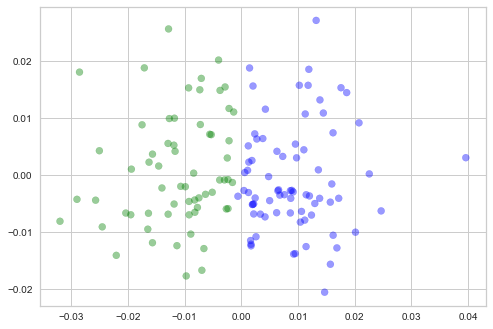

In [23]:
colors = ['blue', 'green']
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[label[i]] for i in range(len(PCA_components))]
T=PCA_components 
plt.scatter(T[0], T[1],
            c=features_colors, marker='o',
            alpha=0.4
        )


From the above scatter plot, it very well may be observed that 2 distinct clusters have dissipated in a distinct pattern. Additionally, we can see for the small outliers presented in it. Furthermore, we have added all the clusters in the original Data Frame.

#### 9. Projecting the feature for K-means Clusters,



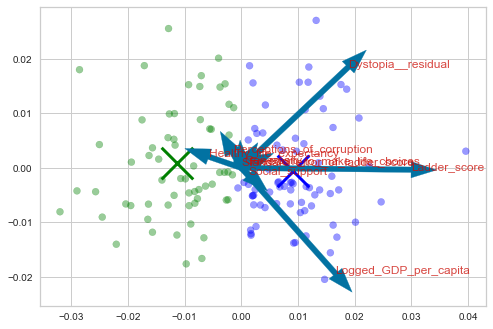

In [24]:
data = pd.DataFrame(data)
columns = data.columns
xvector =  pca.components_[0] * max(T[0])
yvector =  pca.components_[1] * max(T[1])



for i in range(len(columns)):
  
    plt.arrow(0, 0, xvector[i], yvector[i],color='b')
   
    plt.text(xvector[i], yvector[i], list(columns)[i], color='r', alpha=0.75)

plt.scatter(T[0], T[1],
            c=features_colors, marker='o',
            alpha=0.4)

#plot the centroids
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', s= 1000,
            linewidths=3, c=colors )            
plt.show()



To project each principal component axis of their significance we are utilizing arrow and scatter plot which is available in the matplotlib.pyplot. The function arrow() adds the arrow to the diagram dependent on the directions passed to it.  x, y: The x and y directions of arrow base. dx, dy: The length of the arrow along x and y heading. 

The graph above gives a detailed information on the location of each of the variables and the locations of centroids. In the K-means algorithm after the centroids are determined each of the data points are allocated into the closest centroid. The illustration above gives a clear division between more and less developed countries. The variables such as GDP per capita, ladder score showing a larger impact on determining the clusters than the rest. Dystopia + residual shows a large component score as well, however it is just the score of dystopia (1.95) + the distance of each data point from the actual model, it is a good way to
determine how well each data point fits the "Dystopia" model, but isn't as useful in our research.

The arrows are the projection of each element on the principal component axis. These arrows address the degree of significance of each element in the multidimensional scaling. For instance, Ladder_Score  and Logged_GDP_capita offer more than different highlights.


#### 10. Plotting the dendrogram for Agglomerative clustering,

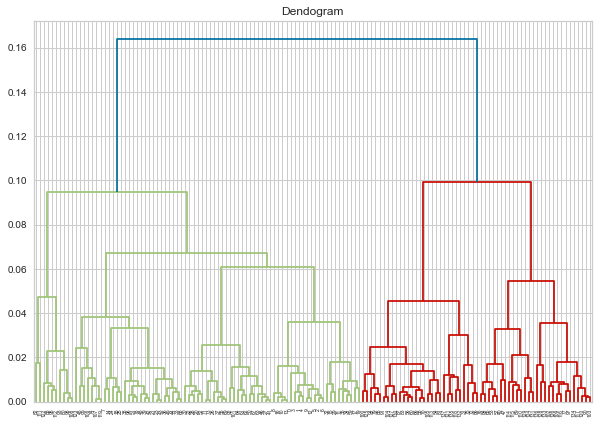

In [25]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc. linkage (principalComponents, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')

If we draw a horizontal line that passes through the longest distance without crossing a horizontal line, we get 3 clusters shown in the above figure.

Presently we know the number of clusters for our dataset, the subsequent stage is to group the information focuses into these 2 clusters. To do as such we will again utilize the AgglomerativeClustering class of the sklearn.cluster library.


#### 11. Justification of the selected linkage method,


I used "ward" technique for linkage function since Wards method looks to pick the progressive grouping steps in order to limit the expansion in Error Sum of Squares at each step. Additionally, the ward method is used because we performed the PCA in this dataset. It is based on multidimensional variance. 

There are normally a few linkage strategies that could be utilized in hierarchical clustering. Among the fundamental ones are: complete, single, normal and wards techniques. Deciding the right technique is significant since it would produce an off-base number of groups or dole out information into less ideal groups in any case. The strategy is picked relying upon the sort of information utilized in the bunching investigation. The default method in clustering is the wards method which is not at all like other referenced techniques don't investigate the distance straightforwardly and dissect the difference all things considered. Accordingly, at the lower part of the dendrogram, the amount of squared distances begins from nothing and increments as we combine bunches. In this specific examination, the ward's technique was the ideal decision since it is the most suitable strategy for quantitative datasets. It is additionally founded on multidimensional changes same as head parts dependent on which we will play out the grouping investigation. The still up in the air were two clear groups that could be seen underneath the dabbed red line. It is noticeable that one of the groups is genuinely bigger than the other one.

Moreover, I used “Euclidean distance” to track down the distance between two points. The Euclidean distance is the most generally utilized distance measure when the variables are continuous  (either interval or ratio scale). The Euclidean distance between two points computes the length of a portion associating the two points. It is the most obvious method of addressing the distance between two points.


In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
Hierical_label = cluster.fit_predict(principalComponents)
Hierical_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

From the above scatter plot, it very well may be observed that 2 distinct clusters have dissipated in a distinct pattern. Furthermore, we have added all the clusters in the original Data Frame.

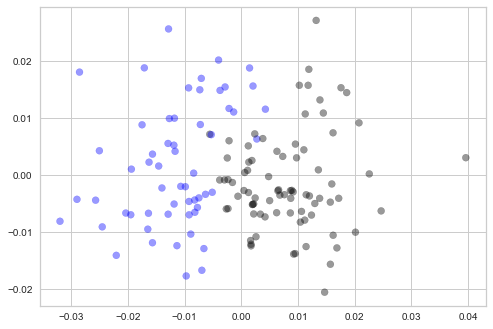

In [27]:
colors = ['blue','black']
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[Hierical_label[i]] for i in range(len(PCA_components))]
T=PCA_components 
plt.scatter(T[0], T[1],
            c=features_colors, marker='o',
            alpha=0.4)

#### 12. Projecting the feature for Agglomerative Clusters,

As similar to the K- Means clustering the Agglomerative clusters also have the same important variables to determines the clusters. The important variables are 
The arrows are the projection of each element on the principal component axis. These arrows address the degree of significance of each element in the multidimensional scaling. For instance, Perceptions_of_acorruption and standard_error_of_ladder_score offer more than different highlights.



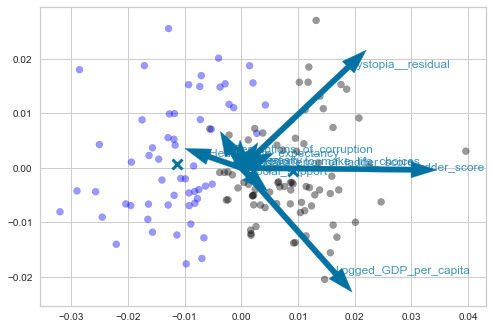

In [28]:
for i in range(len(columns)):
    # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],color='b')
 
    plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75)

plt.scatter(T[0], T[1], c=features_colors, marker='o',alpha=0.4)

#plot the centroids
plt.scatter(centers[:, 0], centers[:, 1],marker='x',s=100,linewidths=3)            
plt.show()


The final results within hierarchical clustering analysis produced similar results to kmeans clustering. It can be seen some of the datapoints in one cluster are colliding with the other, thus more overlapping is indicated in this case in comparison to kmeans. Similar to before, the attributes that explain most of the principal components are Logged GDP per capita and Ladder score, with the rest still contributing to only a minor portion of the overall variances in the dataset. 

In [29]:
df['k_means_cluster'] = label
df['Hierical_cluster'] = Hierical_label
df.head(5)

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia__residual,k_means_cluster,Hierical_cluster
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186,3.253,0,1
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179,2.868,0,1
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.4,0.919,0.025,0.292,2.839,0,1
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.0,0.955,0.160,0.673,2.967,0,1
4,Netherlands,Western Europe,7.464,0.027,10.932,0.942,72.4,0.913,0.175,0.338,2.798,0,1


In [30]:
df['Hierical_cluster'].value_counts()

1    81
0    57
Name: Hierical_cluster, dtype: int64

#### 13.Meaning of the obtained clusters with reference to “Dystopia,” in contrast to “Utopia”;


In the question, that is given that the main 6 features of the data determine the meaning of Dystopia which is the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support in contrast to “Utopia”. In this way, I found that every variable is independent except the "Perceptions_of_a_corruption” because the variable corruption can be higher for both dystopian and utopian countries. Additionally, in my arrow plot, it shows that the top variable contributing to the PCA is Ladder_score, Dystopia__residual and Logged_GDP_per_capita. However, I cannot justify by sorting the Dystopia__residual and ladder_score as Dystopian country since those two variables don't count as the key feature.


Hence, sorting out all the values in ascending order of the 6 features gives me the countries of "dystopia" and Vice versa.



In [31]:
Dystopia = df.sort_values(by=['Logged_GDP_per_capita','Generosity','Healthy_life_expectancy','Social_support','Freedom_to_make_life_choices'], ascending=True)
Dystopia

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia__residual,k_means_cluster,Hierical_cluster
139,Burundi,Sub-Saharan Africa,3.775,0.107,6.635,0.490,53.400,0.626,-0.024,0.607,2.876,1,0
143,Malawi,Sub-Saharan Africa,3.600,0.092,6.958,0.537,57.948,0.780,0.038,0.729,2.190,1,0
95,Niger,Sub-Saharan Africa,5.074,0.102,7.098,0.641,53.780,0.806,0.018,0.693,3.470,0,1
114,Mozambique,Sub-Saharan Africa,4.794,0.103,7.158,0.744,54.706,0.882,0.061,0.684,2.783,0,0
119,Liberia,Sub-Saharan Africa,4.625,0.106,7.288,0.720,56.498,0.735,0.050,0.850,2.857,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,United Arab Emirates,Middle East and North Africa,6.561,0.039,11.085,0.844,67.333,0.932,0.074,0.589,2.422,0,1
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0,1
14,Ireland,Western Europe,7.085,0.040,11.342,0.947,72.400,0.879,0.077,0.363,2.384,0,1
31,Singapore,Southeast Asia,6.377,0.043,11.488,0.915,76.953,0.927,-0.018,0.082,1.379,1,0


The above code gives the rundown of Dystopian countries since we have sorted the data with Logged_GDP_per_capita. Furthermore, I added every one of the clusters into the data frame.

Post sorting, I found the top 5 countries Burundi, Malawi, Niger, Mozambique, Liberia, determine Dystopia because these countries have lower GDP, lower generosity, low freedom, lower life. Moreover, most affected countries from dystopia belong to the Region Sub-Saharan Africa. In addition, the clusters we got for the countries Burundi, Malawai, and Liberia is 0 in both K-means and Hierarchical clusters. Whereas the country Niger has cluster 1 in both K-means and Hierarchical. Finally, the country Mozambique obtains 1 in K-means and 0 in Hierarchical.

On the other hand we can find the Utopian countries by sorting the data in higher values of GDP, Generosity, Freedom, Higher life expectancy. The data shown belongs to Utopia. 

In [32]:
Utopia = df.sort_values(by=['Logged_GDP_per_capita','Generosity','Healthy_life_expectancy','Social_support','Freedom_to_make_life_choices'], ascending=False)
Utopia

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia__residual,k_means_cluster,Hierical_cluster
7,Luxembourg,Western Europe,7.324,0.037,11.647,0.908,72.600,0.907,-0.034,0.386,2.653,0,1
31,Singapore,Southeast Asia,6.377,0.043,11.488,0.915,76.953,0.927,-0.018,0.082,1.379,1,0
14,Ireland,Western Europe,7.085,0.040,11.342,0.947,72.400,0.879,0.077,0.363,2.384,0,1
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0,1
24,United Arab Emirates,Middle East and North Africa,6.561,0.039,11.085,0.844,67.333,0.932,0.074,0.589,2.422,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Liberia,Sub-Saharan Africa,4.625,0.106,7.288,0.720,56.498,0.735,0.050,0.850,2.857,1,0
114,Mozambique,Sub-Saharan Africa,4.794,0.103,7.158,0.744,54.706,0.882,0.061,0.684,2.783,0,0
95,Niger,Sub-Saharan Africa,5.074,0.102,7.098,0.641,53.780,0.806,0.018,0.693,3.470,0,1
143,Malawi,Sub-Saharan Africa,3.600,0.092,6.958,0.537,57.948,0.780,0.038,0.729,2.190,1,0


The top 5 countries belong to Utopia is Luxembourg, Singapore, Ireland, UAE since the countries have larger GDP,larger social support, larger health expectancy where the all the countries belong to cluster 1 in K-means and Hierarchical except Singapore.

#### 14.Justify your findings using the results of tasks 2 and 3

K-mean clustering additionally expands its time of execution. Notwithstanding, when contrasted with the hierarchical clustering, its presentation is better. Hierarchical clustering shows greater quality when contrasted with the k-mean calculation. As an overall end, the k-mean calculation is useful for enormous datasets and hierarchical is useful for little datasets.

To sum up the winning methods, I say both the models K-means and Hierarchical worked well for me. In Hierarchical, with the help of the below heatmap graph, I can see that ladder_score is correlated with it at 0.58, since the ladder_score captures the overall "happiness" of the data it could be concluded that the hierarchical algorithm did a better job at clustering than k-means (which correlated -0.54). On the other hand, the k-means algorithm showed no in-between cluster overlapping, with clusters separated.
Overall, both of the clustering algorithms did a good job at determining between Dystopic and Utopic countries, there was a 0.80 correlation between the two indicating some division on how the data points were allocated.

<AxesSubplot:>

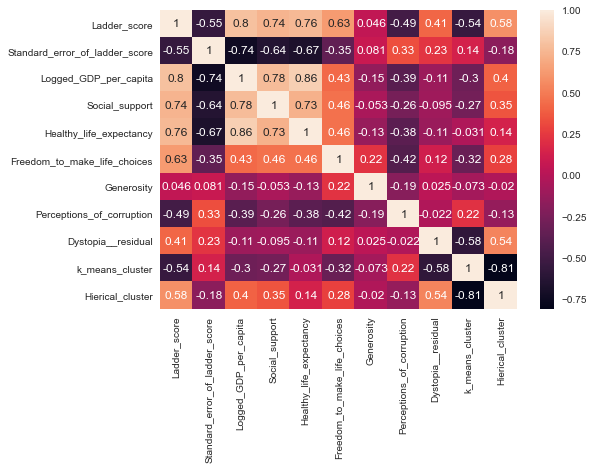

In [33]:
sns.heatmap(df.corr(),annot = True)